Para meu trabalho final optei por fazer uma regressão linear para prever o custo médico baseado nos seguintes fatores:
- Idade;
- Sexo;
- IMC;
- Quantidade de filhos;
- Se a pessoa fuma ou não fuma;
- Região do país em que a pessoa vive.

Os dados se referem a pessoas residentes nos Estados Unidos e foram coletados de 2010 a 2020.

Escolhi esse tema porque esse algoritmo pode auxiliar às pessoas a se planejarem financeiramente com seus gastos com saúde e também entenderem o que pode influenciar nesse valor.

Para limpeza dos dados, foram realizadas verificações para identificar e remover valores ausentes e duplicados.

Foi necessário atribuir valores numéricos àquelas features que não eram numéricas (mapeamento) para que que fosse possível realizar a regressão linear.

      Age  Sex   BMI  Children  Smoker  Region  Medical Cost
0      58    0  15.6         2       1       2      17907.54
1      24    0  29.8         0       1       3      16312.64
2      50    0  29.0         5       0       2       6819.21
3      35    0  34.0         1       0       1       5247.87
4      31    1  17.6         3       1       1      17525.49
...   ...  ...   ...       ...     ...     ...           ...
9995   24    1  26.9         2       1       1      16551.53
9996   49    1  33.4         3       0       3       6376.05
9997   52    1  38.1         5       1       2      18760.27
9998   24    0  33.4         4       0       2       5471.91
9999   24    1  21.7         5       0       0       4952.24

[10000 rows x 7 columns]
Age             0
Sex             0
BMI             0
Children        0
Smoker          0
Region          0
Medical Cost    0
dtype: int64


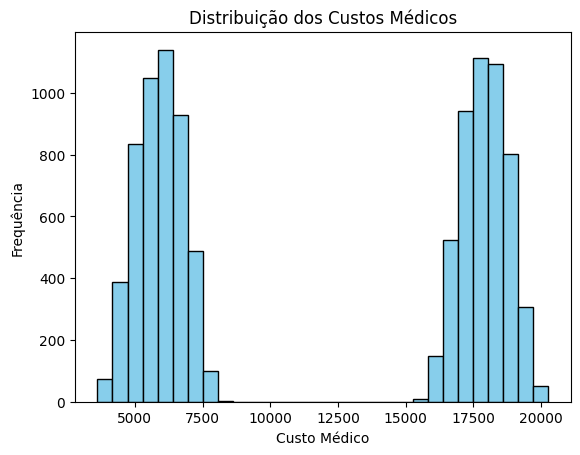

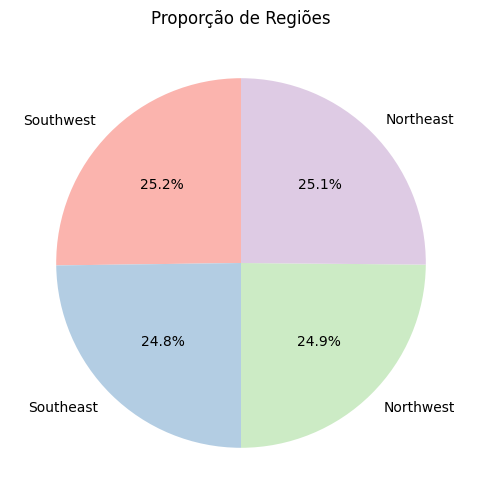

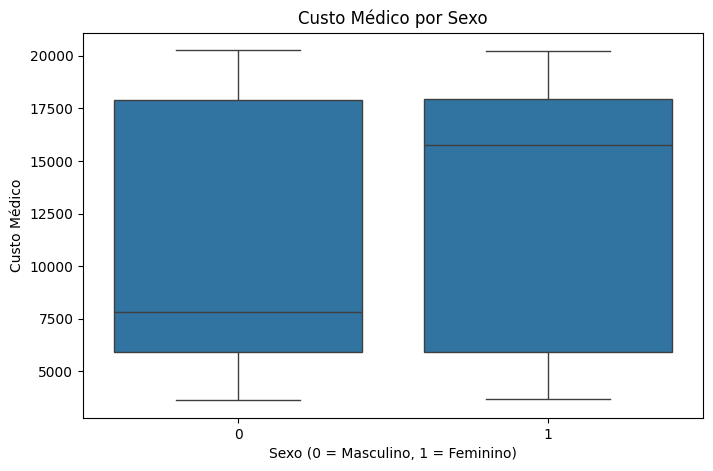

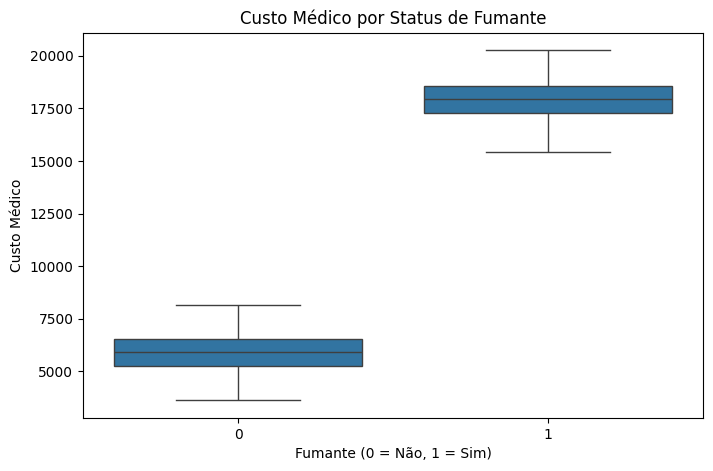

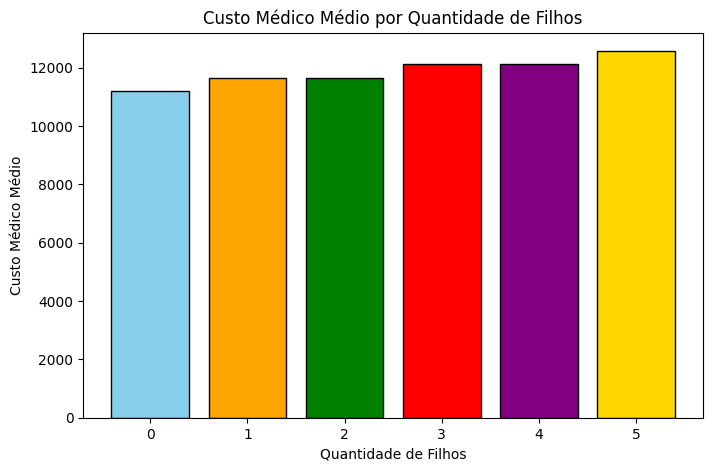

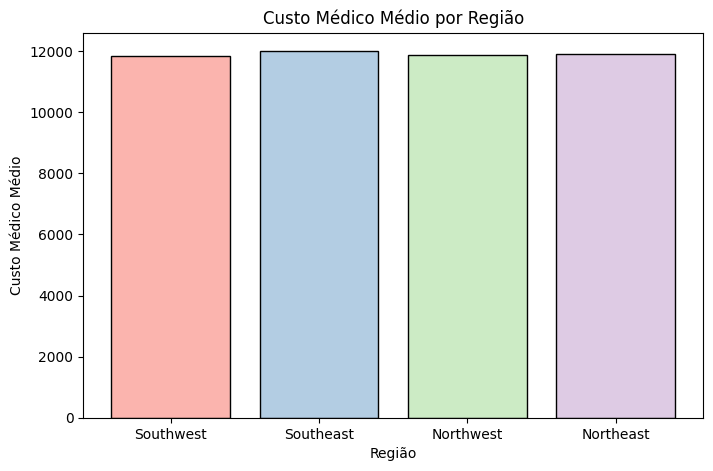

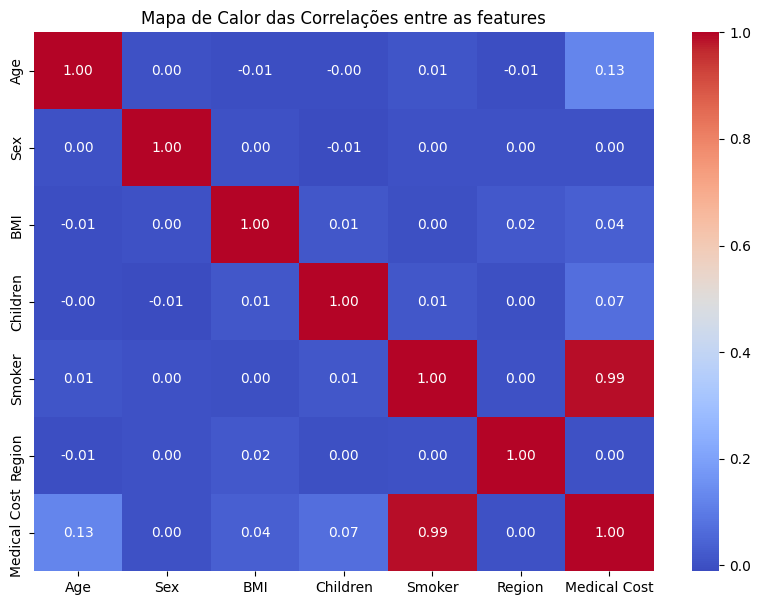

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://raw.githubusercontent.com/TigasConke/IA/refs/heads/main/medical_costs.csv"
df = pd.read_csv(url)

# Mapeamento (atribuindo valores numéricos para sexo, regiões e fumante ou não fumante)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

df['Region'] = df['Region'].map({
    'southwest': 0,
    'southeast': 1,
    'northwest': 2,
    'northeast': 3
})

df['Smoker'] = df['Smoker'].map({'no': 0, 'yes': 1})

print(df)

# Verificando valores ausentes
print(df.isnull().sum())

# Removendo linhas com valores ausentes
df = df.dropna()

# Removendo linhas duplicadas
df = df.drop_duplicates()

# Histograma dos custos médicos
plt.hist(df['Medical Cost'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição dos Custos Médicos')
plt.xlabel('Custo Médico')
plt.ylabel('Frequência')
plt.show()


# Gráfico de setores das regiões
regioes_labels = ['Southwest', 'Southeast', 'Northwest', 'Northeast']
regioes_counts = df['Region'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(regioes_counts, labels=regioes_labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title('Proporção de Regiões')
plt.show()

# Gráfico de barras sobre o impacto do sexo no custo médico
genero_labels = ['Masculino', 'Feminino']
custo_medio_genero = df.groupby('Sex')['Medical Cost'].mean()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Sex', y='Medical Cost', data=df)
plt.title('Custo Médico por Sexo')
plt.xlabel('Sexo (0 = Masculino, 1 = Feminino)')
plt.ylabel('Custo Médico')
plt.show()

# Gráfico de barras sobre o impacto do status de fumante no custo médico
plt.figure(figsize=(8, 5))
sns.boxplot(x='Smoker', y='Medical Cost', data=df)
plt.title('Custo Médico por Status de Fumante')
plt.xlabel('Fumante (0 = Não, 1 = Sim)')
plt.ylabel('Custo Médico')
plt.show()

# Gráfico de barras sobre impacto da quantidade de filhos no custo médico
plt.figure(figsize=(8, 5))
cores = ['skyblue', 'orange', 'green', 'red', 'purple', 'gold']
custo_medio_filhos = df.groupby('Children')['Medical Cost'].mean()
plt.bar(custo_medio_filhos.index, custo_medio_filhos.values, color=cores[:len(custo_medio_filhos)], edgecolor='black')
plt.title('Custo Médico Médio por Quantidade de Filhos')
plt.xlabel('Quantidade de Filhos')
plt.ylabel('Custo Médico Médio')
plt.xticks(custo_medio_filhos.index)
plt.show()

# Gráfico de barras sobre custo médico médio por região
plt.figure(figsize=(8, 5))
custo_medio_regiao = df.groupby('Region')['Medical Cost'].mean()
plt.bar(regioes_labels, custo_medio_regiao.values, color=plt.cm.Pastel1.colors[:len(custo_medio_regiao)], edgecolor='black')
plt.title('Custo Médico Médio por Região')
plt.xlabel('Região')
plt.ylabel('Custo Médico Médio')
plt.show()

# Mapa de calor para visualizar quais features são mais correlatas com o custo médico
plt.figure(figsize=(10, 7))
correlacao = df.corr(numeric_only=True)
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor das Correlações entre as features')
plt.show()

Atribuição de X e Y, criação de modelo, treino, teste e previsão com novas entradas


In [ ]:
X = df[['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Region']]
y = df['Medical Cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Erro Quadrático Médio (MSE): {mse}")
print("Coeficientes (para cada entrada):", modelo.coef_)
print("Intercepto:", modelo.intercept_)

nova_entrada = pd.DataFrame([[21, 0, 19.14, 0, 0, 1]], columns=['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Region'])
nova_previsao = modelo.predict(nova_entrada)
print(f"Custo médico previsto: ${nova_previsao[0]:.2f}")
# Dados da nova entrada: 21 anos, masculino, IMC 19.14, 0 filhos, não fumante, região sudeste

Erro Quadrático Médio (MSE): 84935.35538635687
Coeficientes (para cada entrada): [4.99431728e+01 8.78517747e+00 2.88891353e+01 2.01771058e+02
 1.20012056e+04 1.36450209e+00]
Intercepto: 2524.8033874228113
Custo médico previsto: $4127.91


Como pode ser observado pelo resultado da previsão e dos gráficos exibidos (principalmente pelo mapa de calor), as features tem influência no resultado do custo médico, mas gostaria de destacar uma feature que impacta significativamente no resultado da previsão, o status de fumante.

Para ilustrar melhor o quanto ser fumante ou não influencia no custo médico da pessoa, irei realizar duas previsões: as mesmas features nas duas previsões, mudando apenas o status de fumante.

Previsão com a pessoa sendo não fumante:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Criando DataFrame
url = "https://raw.githubusercontent.com/TigasConke/IA/refs/heads/main/medical_costs.csv"
df = pd.read_csv(url)

# Mapeamento (atribuindo valores numéricos para sexo, regiões e fumante ou não fumante)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

df['Region'] = df['Region'].map({
    'southwest': 0,
    'southeast': 1,
    'northwest': 2,
    'northeast': 3
})

df['Smoker'] = df['Smoker'].map({'no': 0, 'yes': 1})

print(df)

# Verificando valores ausentes
print(df.isnull().sum())

# Removendo linhas com valores ausentes
df = df.dropna()

# Removendo linhas duplicadas
df = df.drop_duplicates()

# Entradas (X)
X = df[['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Region']]
# Saída (Y)
y = df['Medical Cost']

# Dividindo dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Prevendo
y_pred = modelo.predict(X_test)

# Avaliando
mse = mean_squared_error(y_test, y_pred)
print(f"Erro Quadrático Médio (MSE): {mse}")

# Coeficientes e intercepto
print("Coeficientes (para cada entrada):", modelo.coef_)
print("Intercepto:", modelo.intercept_)

# Novas entradas
nova_entrada = pd.DataFrame([[30, 1, 20.5, 1, 0, 1]], columns=['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Region'])
# Nova previsão com as novas entradas
nova_previsao = modelo.predict(nova_entrada)
print(f"Custo médico previsto: ${nova_previsao[0]:.2f}")
# Dados da nova entrada: 30 anos, feminino, IMC 20.5, 1 filhos, não fumante, região sudeste

      Age  Sex   BMI  Children  Smoker  Region  Medical Cost
0      58    0  15.6         2       1       2      17907.54
1      24    0  29.8         0       1       3      16312.64
2      50    0  29.0         5       0       2       6819.21
3      35    0  34.0         1       0       1       5247.87
4      31    1  17.6         3       1       1      17525.49
...   ...  ...   ...       ...     ...     ...           ...
9995   24    1  26.9         2       1       1      16551.53
9996   49    1  33.4         3       0       3       6376.05
9997   52    1  38.1         5       1       2      18760.27
9998   24    0  33.4         4       0       2       5471.91
9999   24    1  21.7         5       0       0       4952.24

[10000 rows x 7 columns]
Age             0
Sex             0
BMI             0
Children        0
Smoker          0
Region          0
Medical Cost    0
dtype: int64
Erro Quadrático Médio (MSE): 84935.35538635687
Coeficientes (para cada entrada): [4.99431728e+01 8.7851

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://raw.githubusercontent.com/TigasConke/IA/refs/heads/main/medical_costs.csv"
df = pd.read_csv(url)

# Mapeamento (atribuindo valores numéricos para sexo, regiões e fumante ou não fumante)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

df['Region'] = df['Region'].map({
    'southwest': 0,
    'southeast': 1,
    'northwest': 2,
    'northeast': 3
})

df['Smoker'] = df['Smoker'].map({'no': 0, 'yes': 1})

print(df)

# Verificando valores ausentes
print(df.isnull().sum())

# Removendo linhas com valores ausentes
df = df.dropna()

# Removendo linhas duplicadas
df = df.drop_duplicates()

X = df[['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Region']]
y = df['Medical Cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Erro Quadrático Médio (MSE): {mse}")
print("Coeficientes (para cada entrada):", modelo.coef_)
print("Intercepto:", modelo.intercept_)

nova_entrada = pd.DataFrame([[30, 1, 20.5, 1, 1, 1]], columns=['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Region'])
nova_previsao = modelo.predict(nova_entrada)
print(f"Custo médico previsto: ${nova_previsao[0]:.2f}")
# Dados da nova entrada: 30 anos, feminino, IMC 20.5, 1 filhos, fumante, região sudeste

      Age  Sex   BMI  Children  Smoker  Region  Medical Cost
0      58    0  15.6         2       1       2      17907.54
1      24    0  29.8         0       1       3      16312.64
2      50    0  29.0         5       0       2       6819.21
3      35    0  34.0         1       0       1       5247.87
4      31    1  17.6         3       1       1      17525.49
...   ...  ...   ...       ...     ...     ...           ...
9995   24    1  26.9         2       1       1      16551.53
9996   49    1  33.4         3       0       3       6376.05
9997   52    1  38.1         5       1       2      18760.27
9998   24    0  33.4         4       0       2       5471.91
9999   24    1  21.7         5       0       0       4952.24

[10000 rows x 7 columns]
Age             0
Sex             0
BMI             0
Children        0
Smoker          0
Region          0
Medical Cost    0
dtype: int64
Erro Quadrático Médio (MSE): 84935.35538635687
Coeficientes (para cada entrada): [4.99431728e+01 8.7851

Com base nas previsões acima, vemos que a diferença de custo médico entre duas pessoa com a mesma situação exceto o status de fumante diferencia de maneira significativa. Enquanto uma pessoa com as mesmas features e não fumante teve uma previsão de custo de 4827.25 USD, a outra pessoa com as mesmas features e fumante teve uma previsão de 16828.45 USD, evidenciando essa influencia da feature fumante (Smoker).